In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('world_happiness.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.set_index('Country', inplace=True)

In [4]:
df.dtypes

Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [8]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

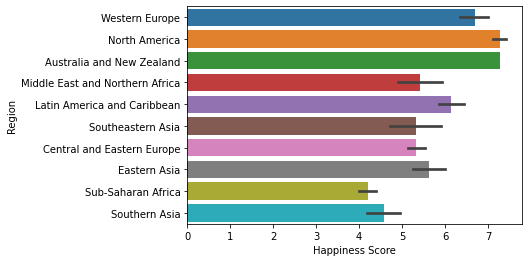

In [9]:
sns.barplot(y='Region',x='Happiness Score',data=df)
#plt.figure(figsize=(10,5))
plt.show()

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
df_Region=df.groupby('Region')
df_Region

In [12]:
df_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [13]:
df_SS_Africa = df[df['Region'] == 'Sub-Saharan Africa']
df_MN_Africa = df[df['Region'] == 'Middle East and Northern Africa']
df_S_Asia = df[df['Region'] == 'Southern Asia']
df_SE_Asia = df[df['Region'] == 'Southeastern Asia']
df_E_Asia = df[df['Region'] == 'Eastern Asia']
df_CE_Europe = df[df['Region'] == 'Central and Eastern Europe']
df_W_Europe = df[df['Region'] == 'Western Europe']
df_L_America = df[df['Region'] == 'Latin America and Caribbean']
df_N_America = df[df['Region'] == 'North America']
df_Aus_NZ = df[df['Region'] == 'Australia and New Zealand']


Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

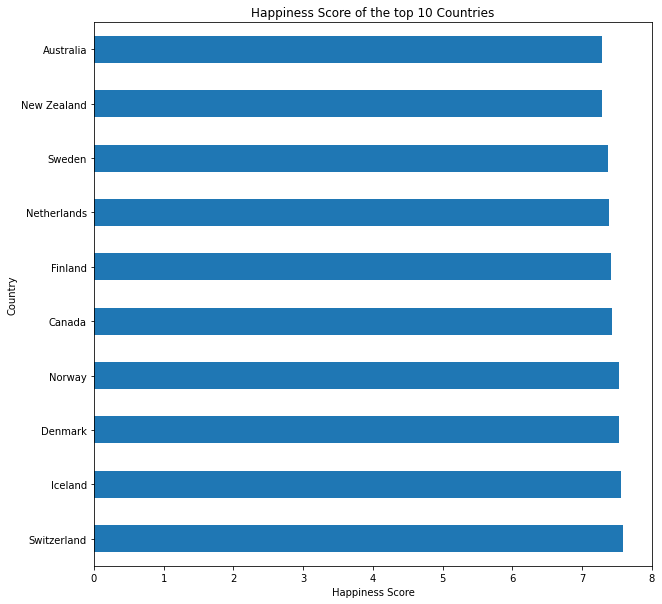

In [14]:
df['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh',figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

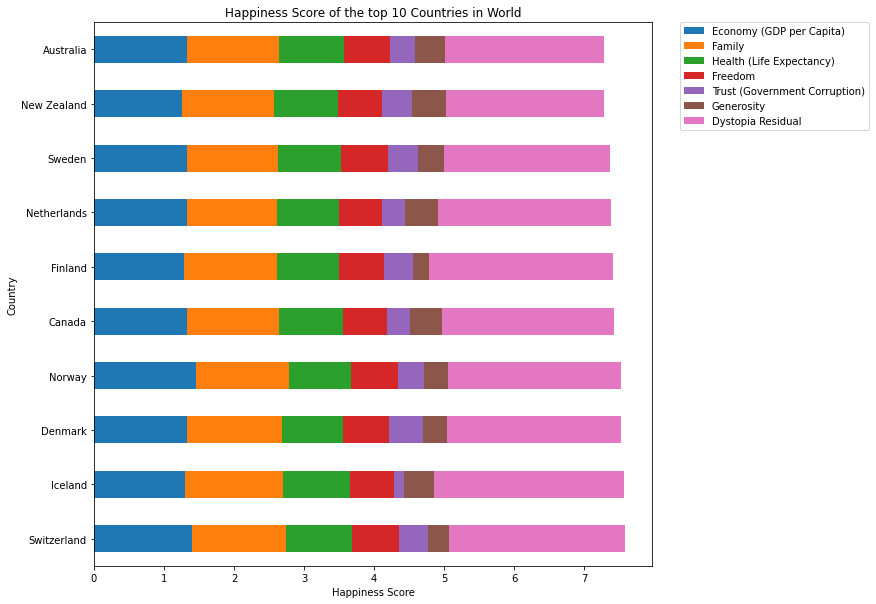

In [15]:
df[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries in World')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

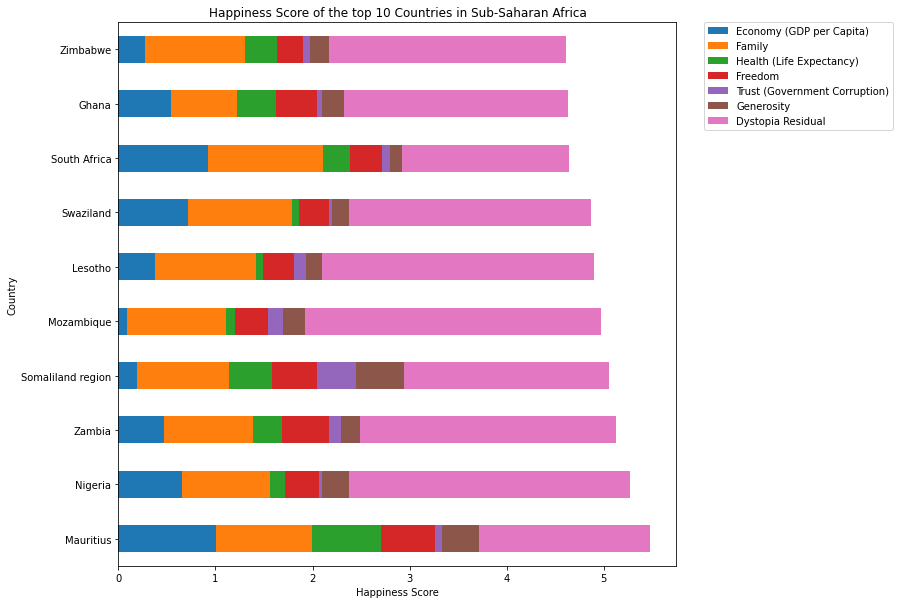

In [16]:
df_SS_Africa[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries in Sub-Saharan Africa')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

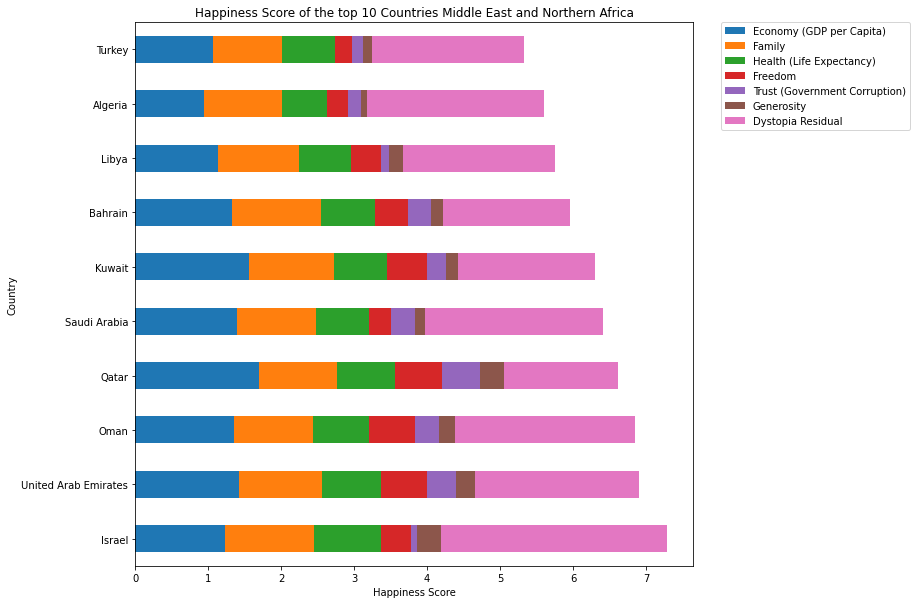

In [17]:
df_MN_Africa[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries Middle East and Northern Africa')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

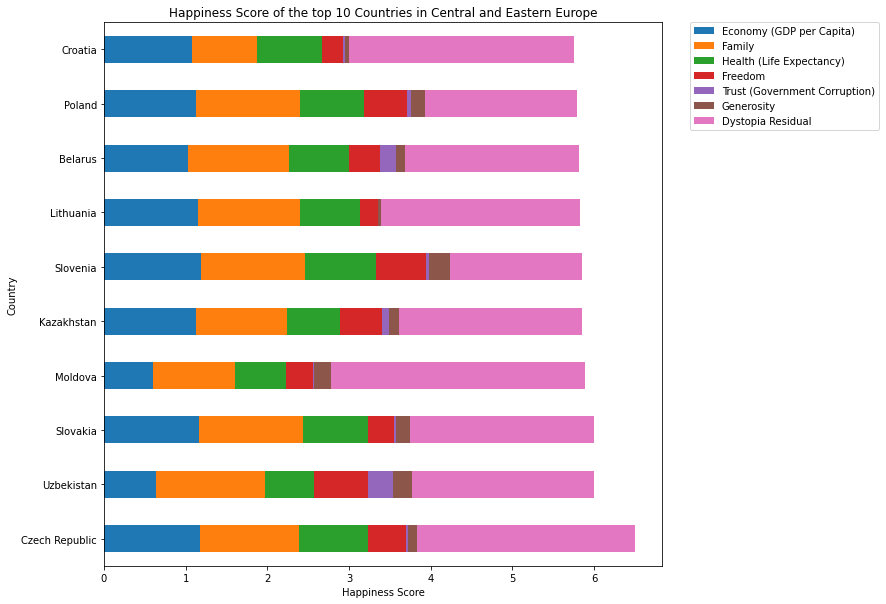

In [18]:
df_CE_Europe[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries in Central and Eastern Europe')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

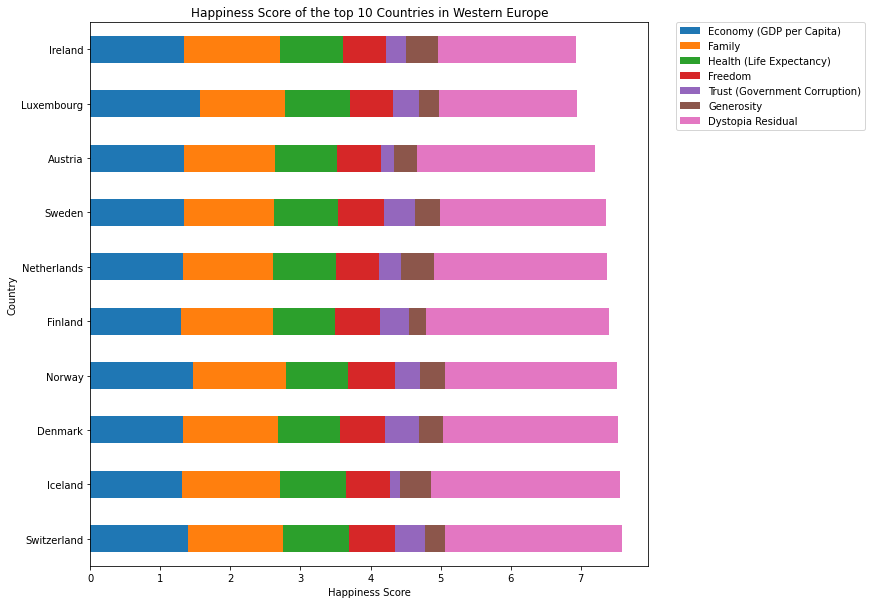

In [19]:
df_W_Europe[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries in Western Europe')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

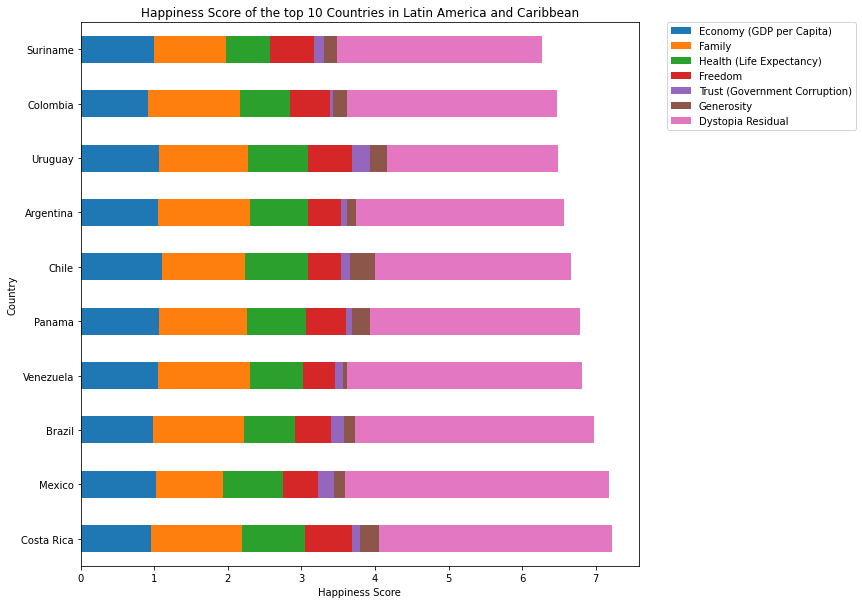

In [20]:
df_L_America[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries in Latin America and Caribbean')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

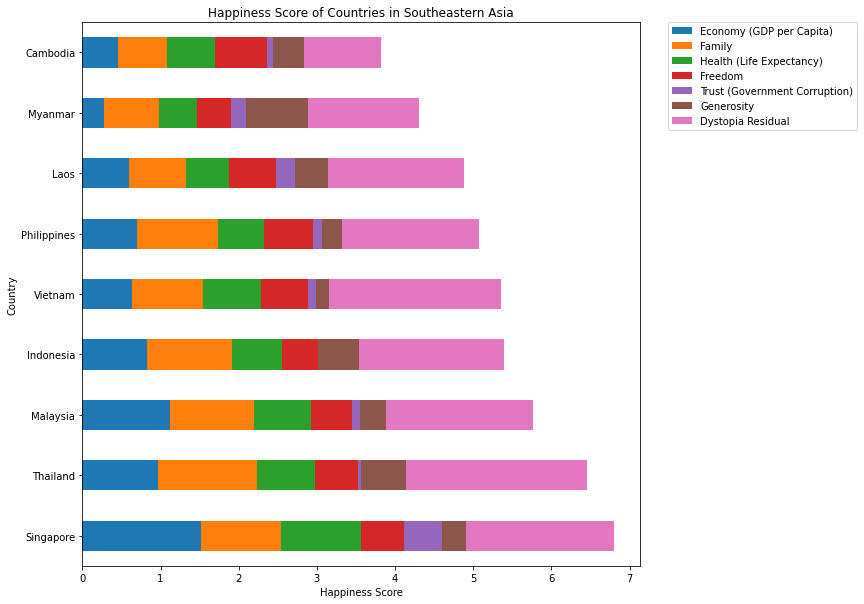

In [21]:
df_SE_Asia[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of Countries in Southeastern Asia')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

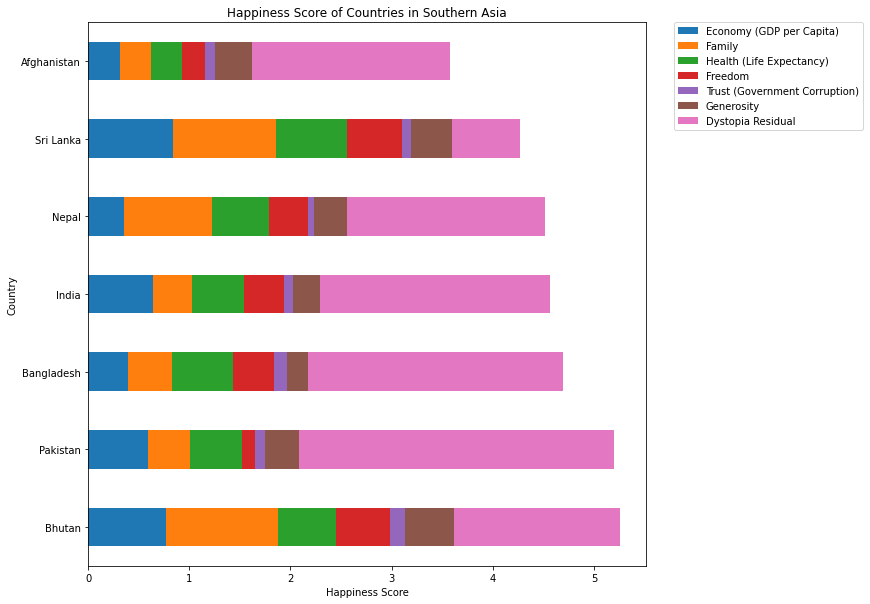

In [22]:
df_S_Asia[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of Countries in Southern Asia')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

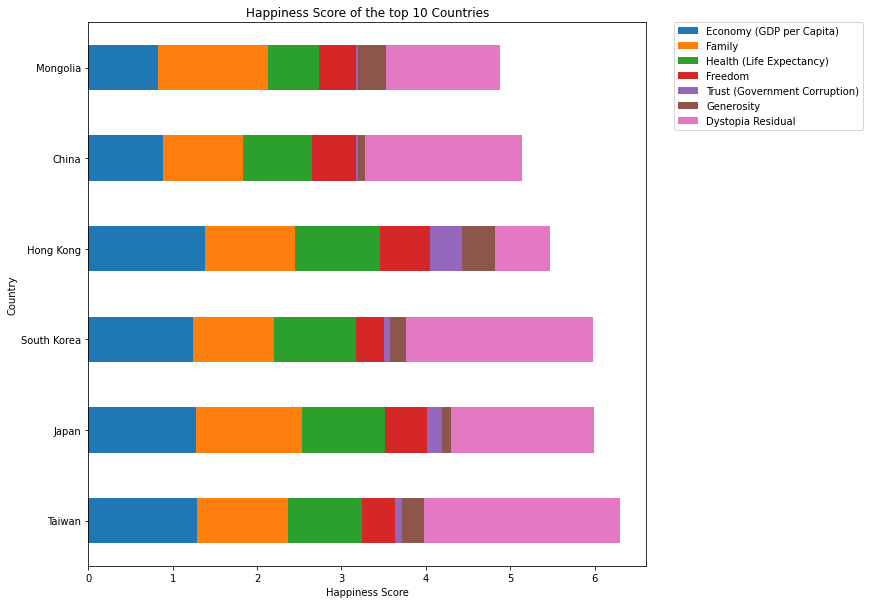

In [23]:
df_E_Asia[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].plot(kind='barh',
                                                                 stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

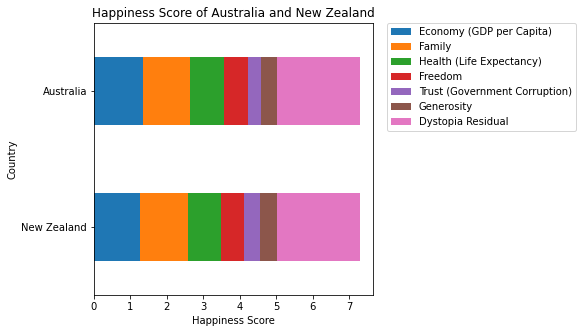

In [24]:
df_Aus_NZ[['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].plot(kind='barh',
                                                                 stacked=True, figsize= (5,5))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of Australia and New Zealand')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

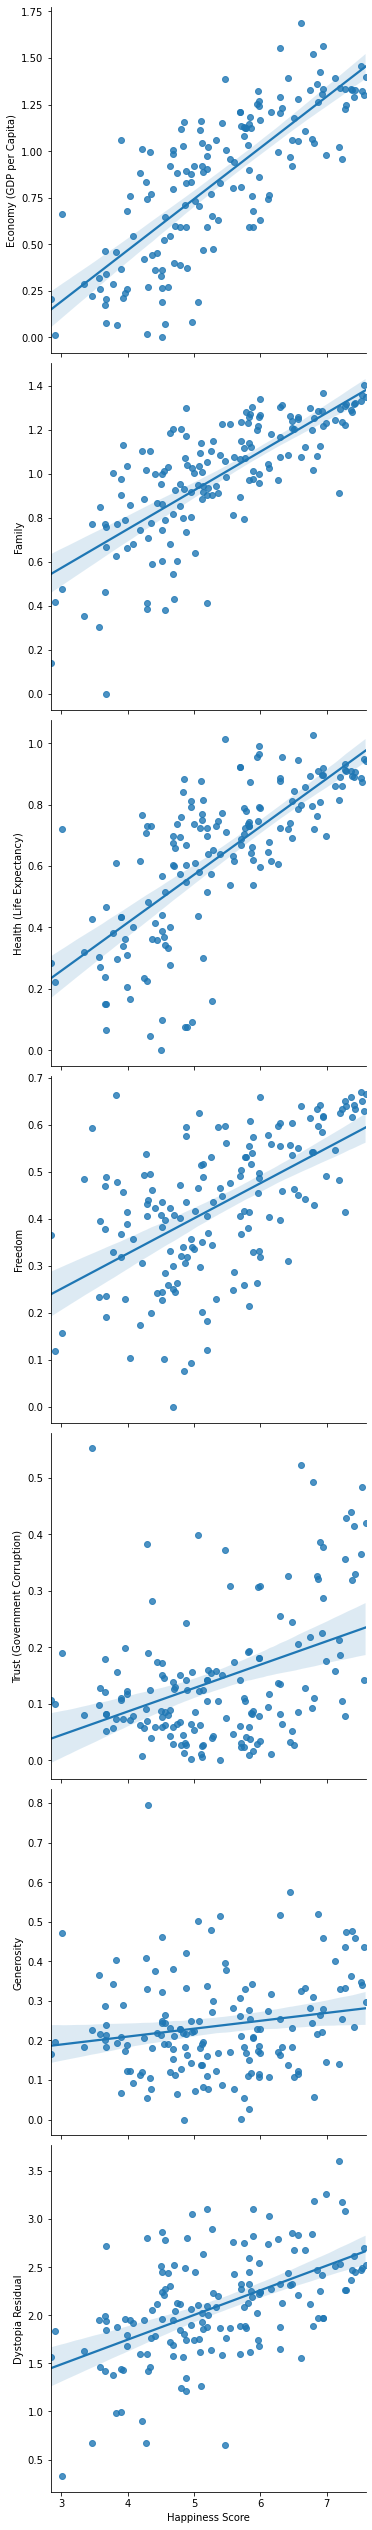

In [25]:
sns.pairplot(data=df, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)','Freedom',
                          'Trust (Government Corruption)','Generosity', 'Dystopia Residual'])

In [26]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


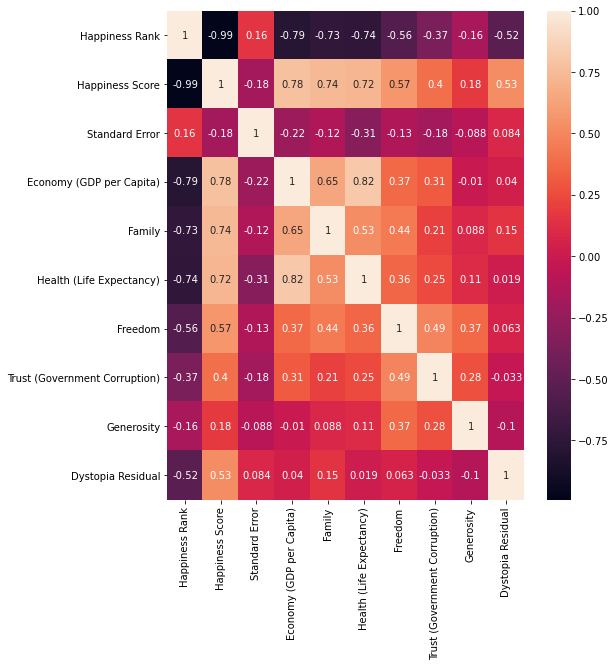

In [27]:
# heatmap
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Happiness Rank                      AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

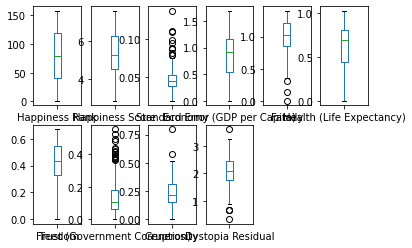

In [28]:
df.plot.box(subplots=True,layout=(2,6))

In [29]:
df.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [30]:
df.drop('Happiness Rank',axis=1,inplace=True)  # least correlated and also not required as happiness scores column is also there
df.drop('Region',axis=1,inplace=True)  # not required as countries are there

In [31]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(158, 9)
(149, 9)


In [32]:
df=df_new
df.shape

(149, 9)

In [33]:
df.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [34]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

Happiness Score                  0.169740
Standard Error                   1.193808
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

In [36]:
#splitting the data for training and test

x=df.drop(columns=['Happiness Score'])
y=df['Happiness Score']

In [37]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.87211124,  1.38191593,  1.35787859, ...,  2.37696253,
         0.59197519,  0.7568764 ],
       [ 0.19358346,  1.13832385,  1.5678818 , ...,  0.05839944,
         1.6679265 ,  1.10929978],
       [-0.93261151,  1.19821973,  1.40197448, ...,  2.84395751,
         0.94809954,  0.70850719],
       ...,
       [-1.11074959, -1.40259581, -2.81135429, ..., -0.36181681,
         1.13258708, -0.32213507],
       [-0.69380889, -1.48837933, -2.60816264, ..., -0.52862747,
        -0.37850138, -0.9307015 ],
       [ 2.85716182, -2.19013866, -2.36115394, ..., -0.32865079,
        -0.24868987, -0.54943602]])

In [38]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    if r2_scr>max_score:
        max_score=r2_scr
        final_r_state=r_state
print("Maximimum r2 Score is",max_score,'at',final_r_state)

Maximimum r2 Score is 0.999971759320288 at 72


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=72)

In [40]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [41]:
print("R2 Score is: ",r2_score(y_test,pred))
print("RSME is: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score is:  0.999971759320288
RSME is:  0.007162299844809574


In [42]:
#cross validation
from sklearn.model_selection import cross_val_score

lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.99854968 0.99790625 0.9975014  0.99700617 0.99955535]
0.998103773203221 0.0008845910832794261


In [43]:
#saving the above model

import joblib

joblib.dump(lr,'lrfile_World_Happiness_project.obj')                     # save the model in ojet file


['lrfile_World_Happiness_project.obj']